### About:
5/11/2021 Program calculate the correlation coefficient between state and age population in 2012

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="YlGnBu", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Population Range

#### Preprocess Data

In [3]:
!ls

Correlation-2008.ipynb
Correlation-2009.ipynb
Correlation-2010.ipynb
Correlation-2011.ipynb
Correlation-2012.ipynb
Original Dataset
preprocessed_data.xlsx
sheet.xlsx


In [4]:
def parse_data_bis(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows = [51,52,53,54,55,56,57,58,59,60,61,62], usecols=[1,2,3,4,5,6,7])
    return dataset

In [6]:
df_bis = parse_data_bis("sheet.xlsx", "2012") # Due to long name access, I made a copy of preprocessed_data.xlsx and change to sheet

In [7]:
df_bis.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,1171400,447300,523500,1266800,609700,677300,4696000
1,190500,74800,91000,196000,94300,59700,706200
2,1671200,603700,752300,1640500,756600,962000,6386300
3,728600,261000,333200,751800,359400,426100,2860200
4,9597700,3818000,4742800,10290700,4261900,4510200,37221500


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


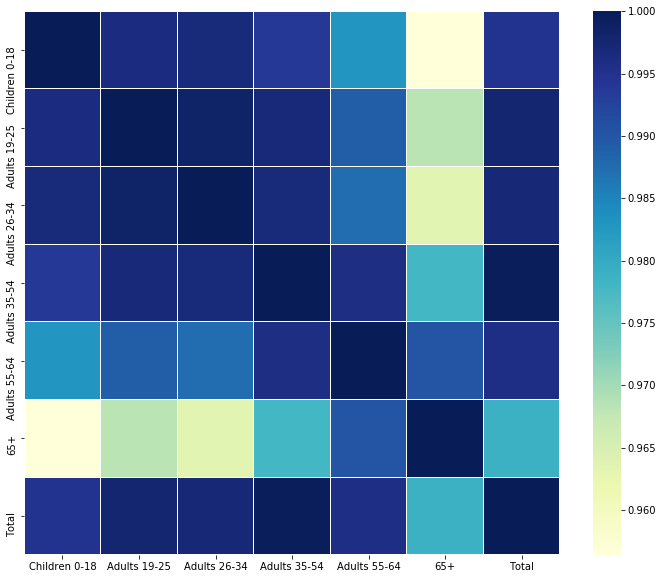

In [8]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


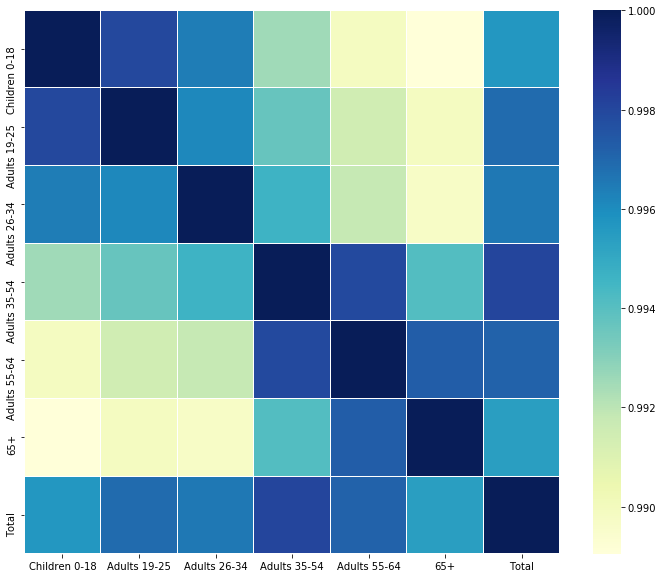

In [9]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


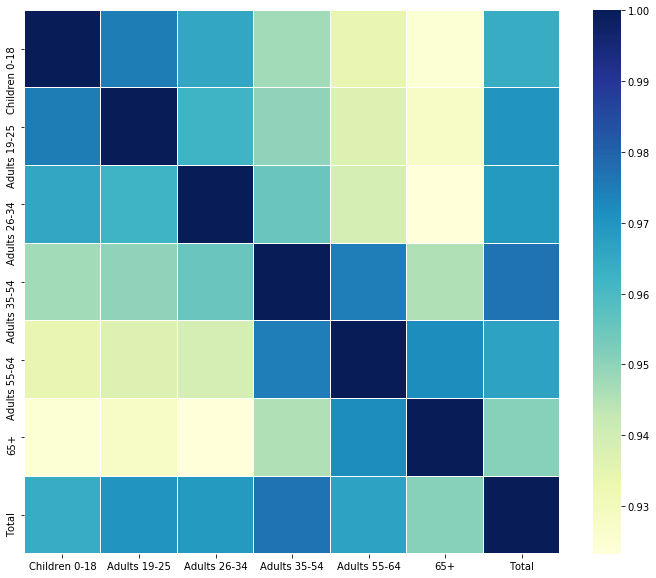

In [10]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [11]:
def parse_data_bs(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,51,52,53,54,55,56,57,58,59,60,61,62], usecols=[0,1,2,3,4,5,6,7], drop=True)
    dataset.set_index("Alabama", inplace=True)
    dataset = dataset.T
    
    return dataset

In [13]:
df_bs = parse_data_bs("sheet.xlsx", "2012")

In [14]:
df_bs.head()

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1171400,190500,1671200,728600,9597700,1273600,827400,211400,4158900,2590600,315700,...,209200,1545700,7248300,907500,126300,1923800,1634300,394700,1355900,139200
447300,74800,603700,261000,3818000,478600,291300,83600,1706400,902800,116300,...,73100,566500,2501100,316300,52900,705400,616800,157100,490900,51700
523500,91000,752300,333200,4742800,652700,368200,96900,2052100,1161700,162600,...,95600,726800,3236000,396300,61900,964000,849400,190000,642800,72000
1266800,196000,1640500,751800,10290700,1409300,1018400,242000,5075100,2726600,349300,...,200700,1729100,6872800,656800,168300,2242600,1862500,486400,1538600,145000
609700,94300,756600,359400,4261900,637000,462500,116100,2445400,1125300,179900,...,108800,815700,2772200,257800,94300,992800,883700,272000,746200,78100


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


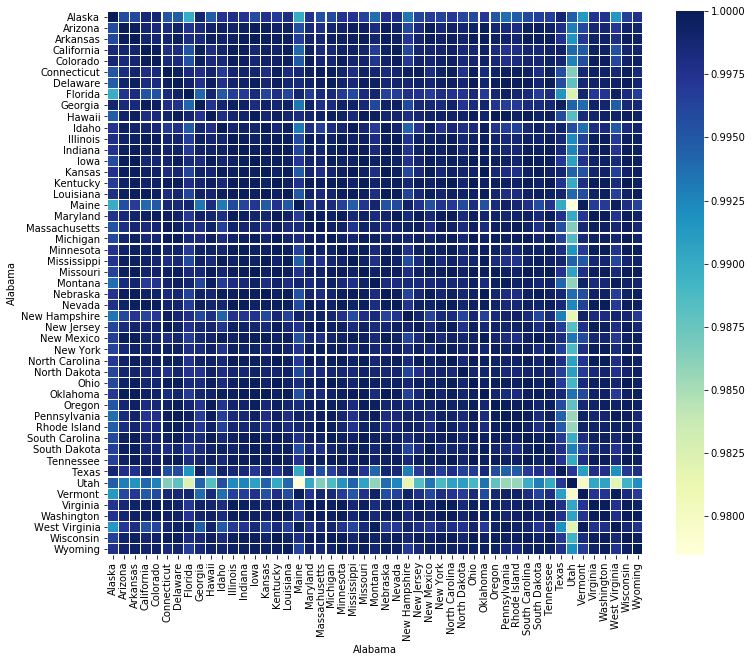

In [15]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


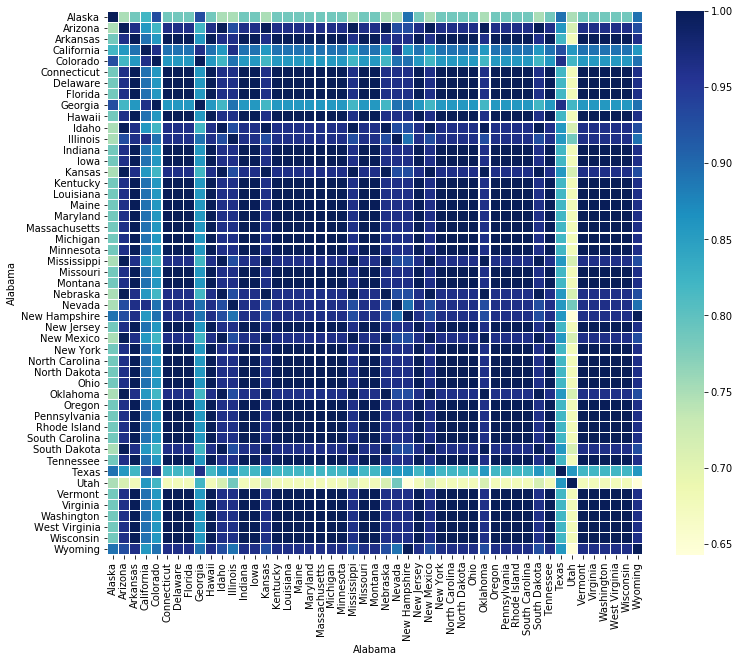

In [16]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


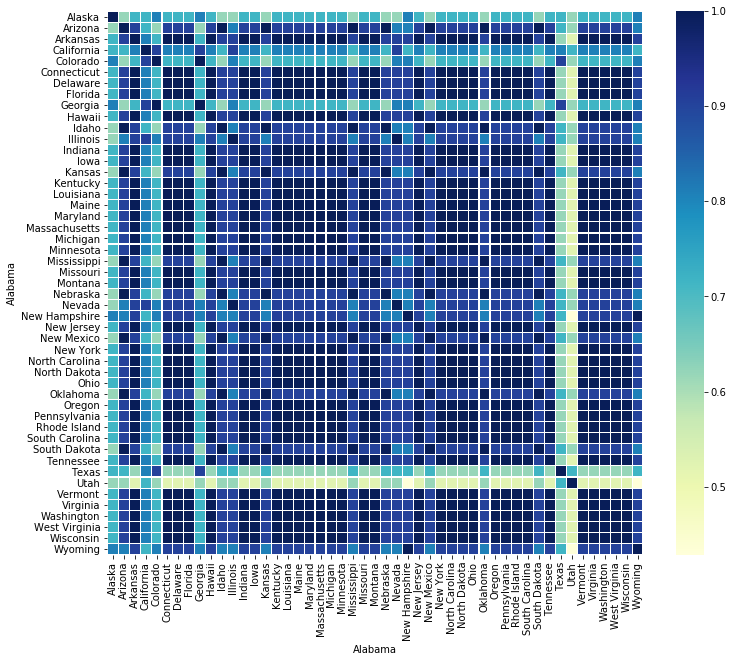

In [17]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?